In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# importing training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# creates another data frame with the stock opening price [row:row,column:column]
training_set = dataset_train.iloc[:,1:2].values 

In [3]:
# feature scaling
# normalization
sc = MinMaxScaler(feature_range=(0,1)) # feature range -> scale will be between 0 and 1
training_set_scaled = sc.fit_transform(training_set) # normalize training_set

In [4]:
# create data structure with 60 timesteps and 1 output, 60 financial days or 3 months
# stock price of the previous 60 financial days
X_train = []
# stock price of the next day
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train = np.array(X_train) # convert to np array
y_train = np.array(y_train) # convert to np array

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

C:\Users\Lawrann\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
# Innitialise LSTM
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation - avoid overfitting
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)) )
regressor.add(Dropout(0.2)) # drop 20% of the neurons in the lSTM layer during training for forward n backprop

# LSTM layer 2
regressor.add(LSTM(units=50, return_sequences=True) )
regressor.add(Dropout(0.2))

#LSTM layer 3
regressor.add(LSTM(units=50, return_sequences=True) )
regressor.add(Dropout(0.2))

#LSTM layer 4
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# output layer
regressor.add(Dense(units=1))

In [7]:
# compile LSTM
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting LSTM to training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 6s 5ms/sample - loss: 0.0414
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/sample - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0061
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0044
Epoch 12/100
1198/1198 [======

1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0016
Epoch 99/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 3s 2ms/sample - loss: 0.0014


In [8]:
# Loading test set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [9]:
#axis=0 is along the verticle axis, horizontal=1
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# for the first financial day prediction, we need the financial data of the past 60 days
# first financial data of prediction - 60 to get past 60 day
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values  
#print(inputs)
inputs = inputs.reshape(-1,1)
#print(inputs)

# normalization
# do not use the fit_transform method as the sc object was already fitted to the training set, directly use
# the transform method because scaling applied to input must be the same scaling applied to the training set
# therefore must not fit scaling object sc again, directly apply transform to get previous scaling on the inputs
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
#print(X_test) ## for each row, 60 financial stock price for prediction
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # convert to 3d structure

# run input through model
predicted_stock_price = regressor.predict(X_test)
# inverse scale the prediction
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

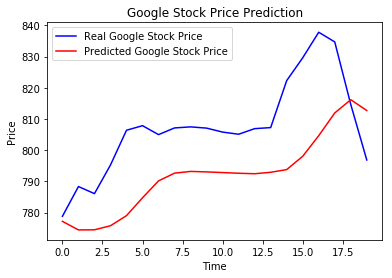

In [10]:
plt.plot(real_stock_price, color = 'blue', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()